In order to visualize a dataset you may need to load it using get_data() method beforehand. Not all the data is shown here due to its large volume.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
from load_data import load, main_data_refs
from flow_algo import flow_to_color
from metrics import flow_norm_diff, ang_error, epe_error

In [13]:
gt_dataset = ['ref', '']
full_datasets_list = main_data_refs + [gt_dataset]

Visualizing vectors
====================

In [6]:
def show_flow_vectors(img_pairs, all_flows, flow_labels, data_ref, flo_dir, is_gray, inline, img_size = 14):
    for img_num in xrange(len(all_flows)):
        flows = all_flows[img_num]
        h, w = flows[0].shape[:-1]

        x, y = np.meshgrid(np.arange(0, w), np.arange(0, h))
        factor = 12
        x = x[::factor,::factor]
        y = y[::factor,::factor]

        fig = plt.subplots(1, len(flows), figsize = (img_size, img_size))
        
        for flow_num in xrange(len(flows)):

            u = flows[flow_num][::factor,::factor, 0]
            v = flows[flow_num][::factor,::factor, 1]

            plt.subplot(1, len(flows), flow_num + 1) # with subplots
            plt.axis('off')

            info = data_ref[0] + ', '
            if len(data_ref[1]) > 0:
                info += data_ref[1] + ', '
            info += '#' + str(img_num + 1) + '\n' + flow_labels[flow_num]
            plt.title(info)

            if not is_gray:
                shown_img = plt.imshow(img_pairs[img_num][0])
            else:
                shown_img = plt.imshow(img_pairs[img_num][0], cmap = 'gray')

            plt.quiver(x, y, u, v, pivot='mid', color='white', angles='xy', headlength=4, antialiased=True,
                       headwidth = 4)
        file_name = flo_dir + '/vis_vectors_{0}.png'.format(img_num + 1)
        plt.savefig(file_name, bbox_inches = 'tight')
        if not inline:
            plt.close()
    if inline:
        plt.show()

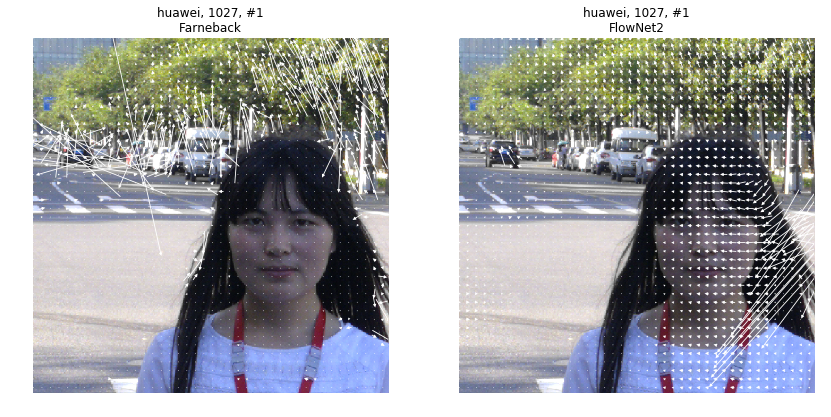

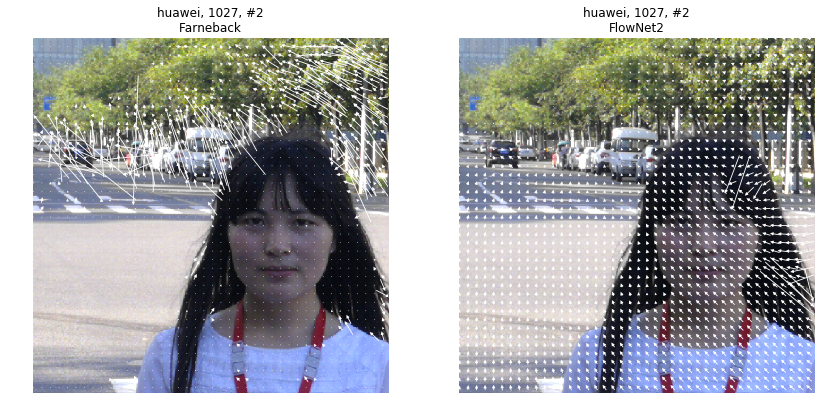

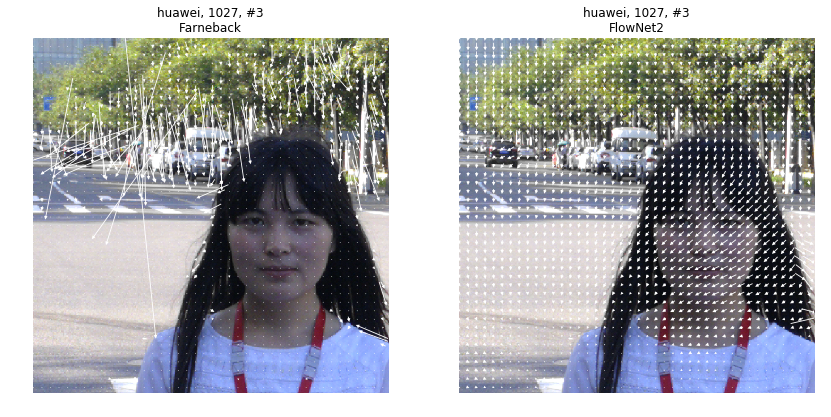

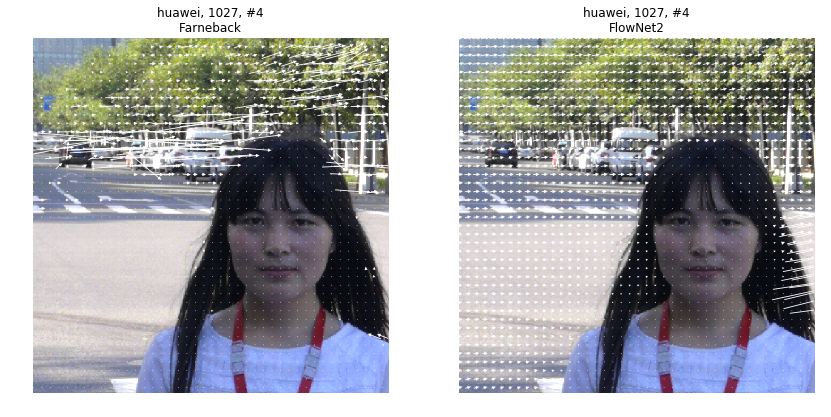

In [5]:
data_ref = main_data_refs[1] # demo
img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*data_ref, get_dirs = True)
show_flow_vectors(img_pairs, all_flows, flow_labels, data_ref, flo_dir, is_gray, inline = True)

In [4]:
for data_ref in full_datasets_list: # run to compute and save all vector visualizations
    img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*data_ref, get_dirs = True)
    show_flow_vectors(img_pairs, all_flows, flow_labels, data_ref, flo_dir, is_gray, inline = False)

/usr/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Colorcoding
================

In [3]:
def show_flow_colors(all_flows, flow_labels, data_ref, flo_dir, inline, img_size = 14):
    for img_num in xrange(len(all_flows)):
        flows = all_flows[img_num]

        fig = plt.subplots(1, len(flows), figsize = (img_size, img_size))
        for flow_num in xrange(len(flows)):
            plt.subplot(1, len(flows), flow_num + 1)
            plt.axis('off')

            info = data_ref[0] + ', '
            if len(data_ref[1]) > 0:
                info += data_ref[1] + ', '
            info += '#' + str(img_num + 1) + '\n' + flow_labels[flow_num]
            plt.title(info)

            img = flow_to_color(flows[flow_num], norm = True)
            shown_img = plt.imshow(img)
        file_name = flo_dir + '/vis_colorcoding_{0}.png'.format(img_num + 1)
        plt.savefig(file_name, bbox_inches = 'tight')
        if not inline:
            plt.close()
    if inline:
        plt.show()

Intensity of these colorcoded flow images is normalized across an image so you can't compare intensities of flow on different pairs this way yet.

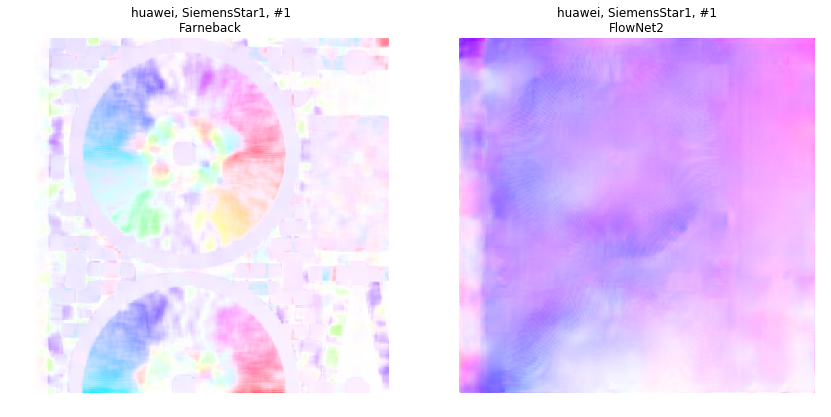

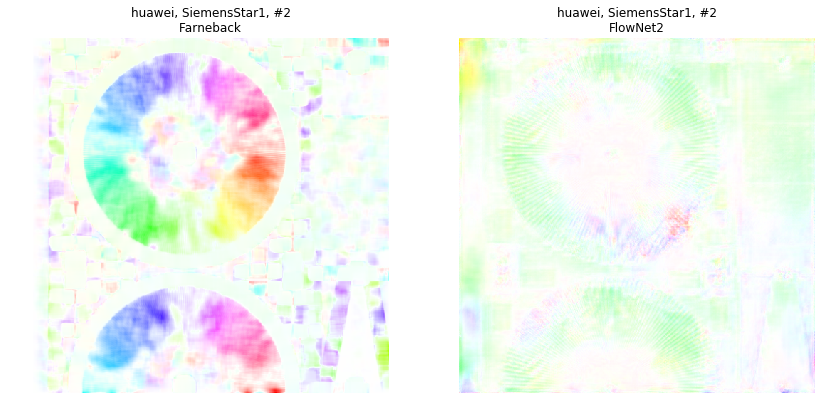

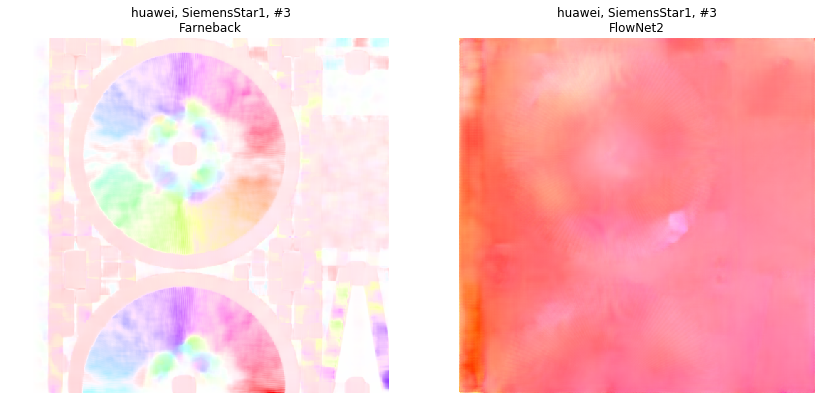

In [36]:
data_ref = main_data_refs[3] # demo
img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*data_ref, get_dirs = True)
show_flow_colors(all_flows, flow_labels, data_ref, flo_dir, inline = True)

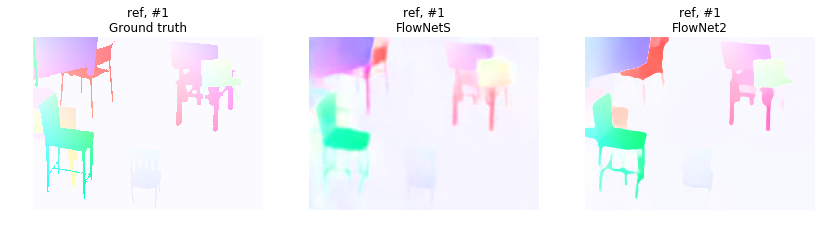

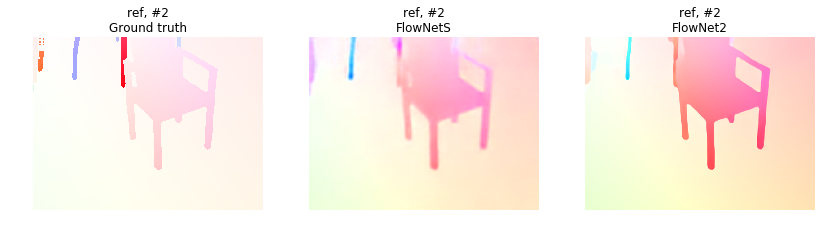

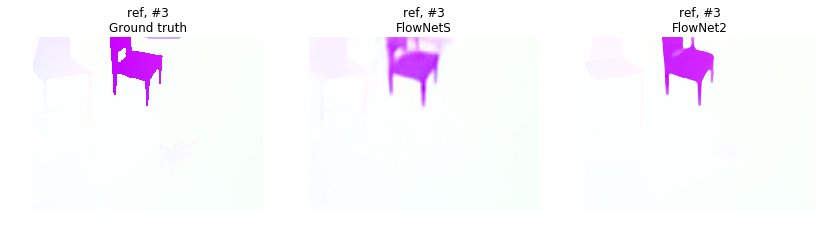

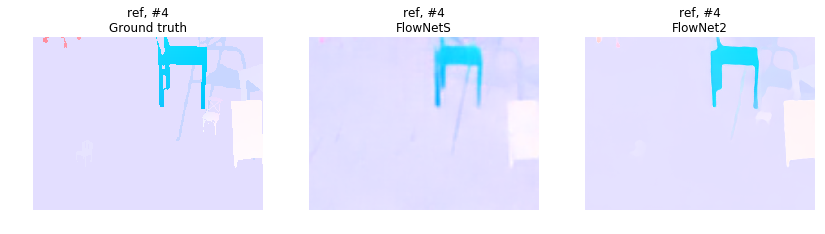

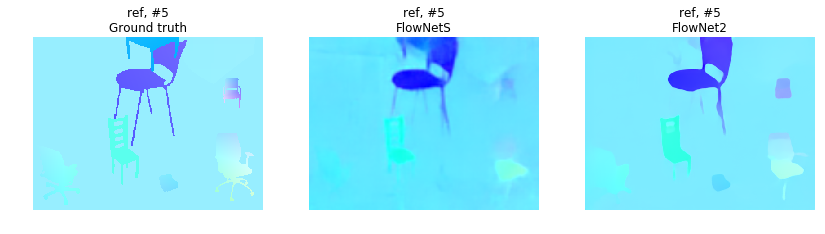

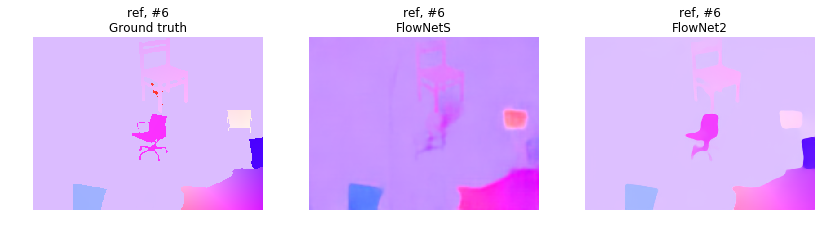

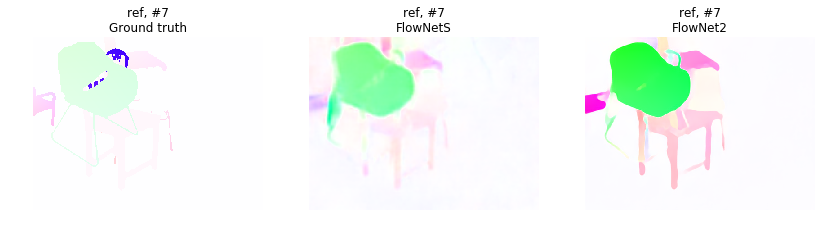

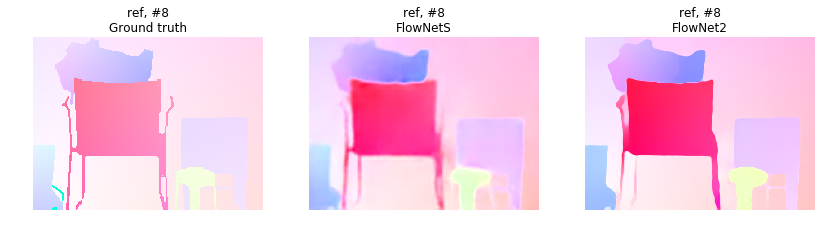

In [4]:
data_ref = ['ref', ''] # another demo
img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*data_ref, get_dirs = True)
show_flow_colors(all_flows, flow_labels, data_ref, flo_dir, inline = True)

In [ ]:
for data_ref in full_datasets_list: # run to compute and save all colorcoding visualizations
    img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*data_ref, get_dirs = True)
    show_flow_colors(all_flows, flow_labels, data_ref, flo_dir, inline = False)

## Flow concatenation trial

In [10]:
# all_flows, all_imgs, flow_labels = get_data('cells', '15/gap1')

In [11]:
# n = 10
# first_flows = [all_flows[i][0] for i in xrange(n)]

In [12]:
# sum_flow = reduce(np.add, first_flows) # invalid

In [13]:
# img = flow_to_color(sum_flow, norm = True)

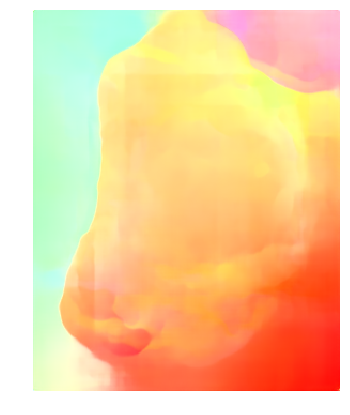

In [14]:
# plt.figure(figsize = (7, 7))
# plt.axis('off')
# shown_img = plt.imshow(img)

Visualizing error and computing metrics
===========

In [15]:
def show_diff_metrics(all_flows, flow_labels, flo_dir, inline, img_size = 17):
    for img_num in xrange(8):
        flows = all_flows[img_num]

        fig = plt.subplots(1, len(flows), figsize = (img_size, img_size))

        plt.subplot(1, len(flows), 1)
        plt.axis('off')

        info = data_ref[0] + ', '
        if len(data_ref[1]) > 0:
            info += data_ref[1] + ', '
        info += '#' + str(img_num + 1) + '\nGround truth'
        plt.title(info)

        img = flow_to_color(flows[0], norm = True)
        shown_img = plt.imshow(img)
        
        for flow_num in xrange(1, len(flows)):
            epe = epe_error([flows[0], flows[flow_num]])
            ang = ang_error([flows[0], flows[flow_num]])

            plt.subplot(1, len(flows), flow_num + 1)
            plt.axis('off')
            flow_info = 'Normalized diff\n' + flow_labels[flow_num] + '\n' + 'EPE: {0:.2f}, ANG: {1:.2f}'.format(epe, ang)
            plt.title(flow_info)

            diff = flow_norm_diff([flows[0], flows[flow_num]])
            shown_img = plt.imshow(diff, cmap = 'gray')
        file_name = flo_dir + '/vis_errors_{0}.png'.format(img_num + 1)
        plt.savefig(file_name, bbox_inches = 'tight')
        if not inline:
            plt.close()
    if inline:
        plt.show()

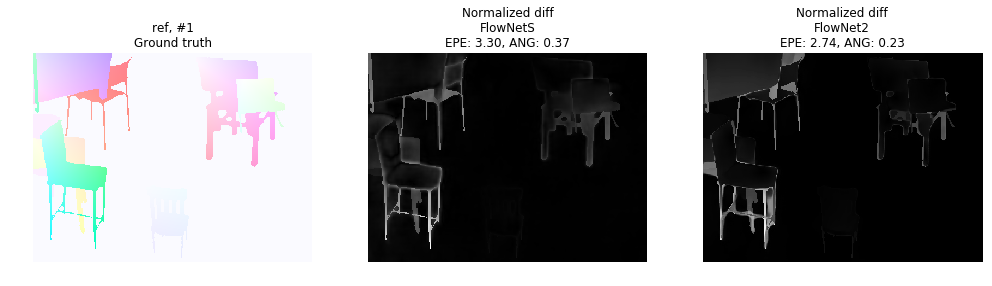

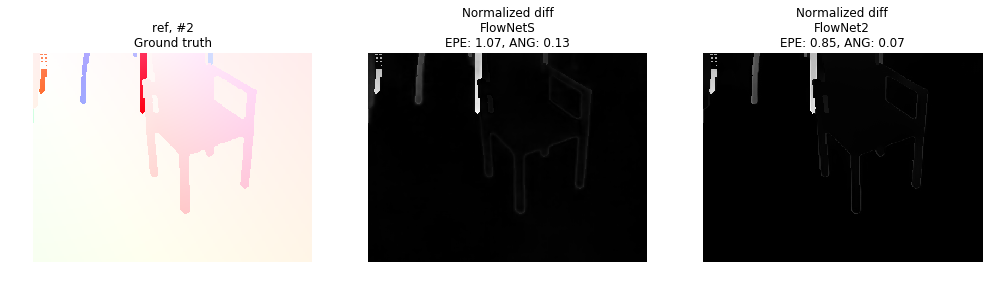

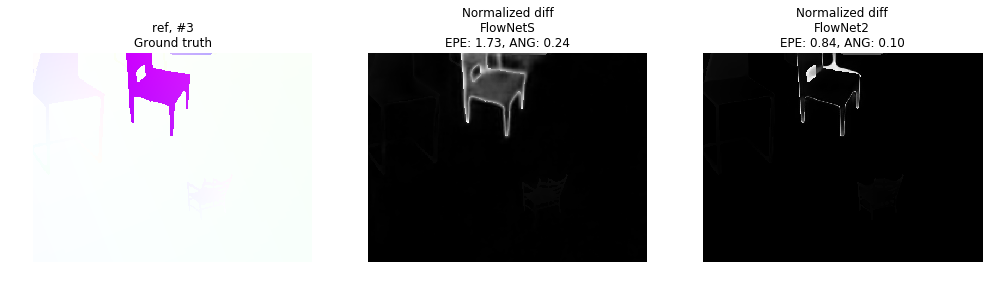

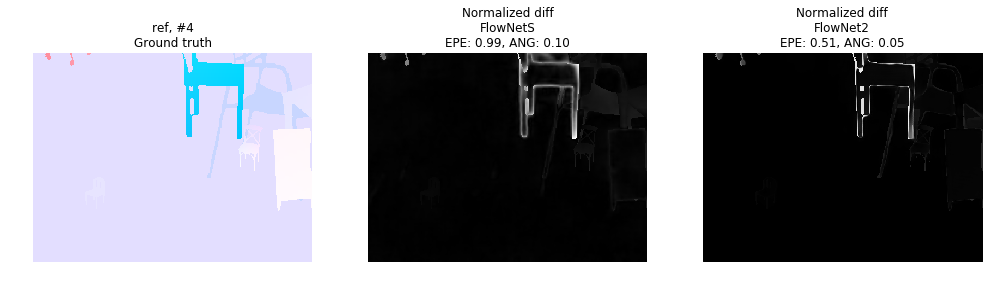

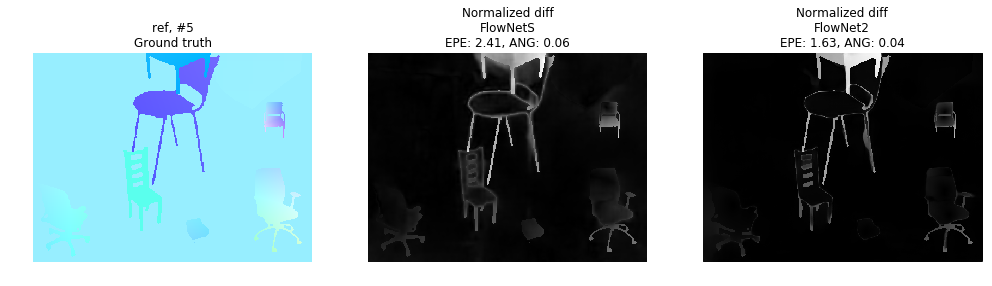

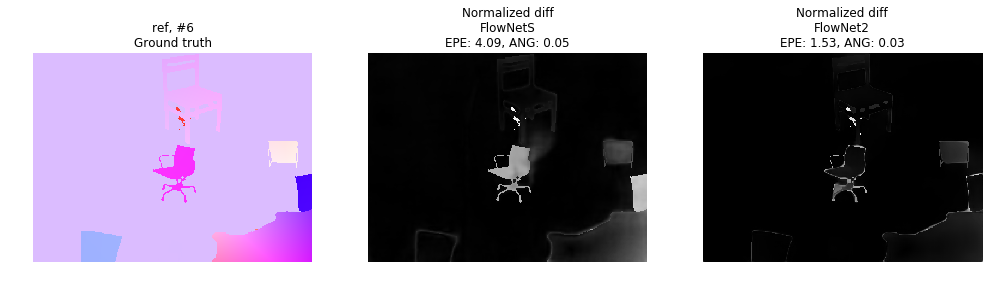

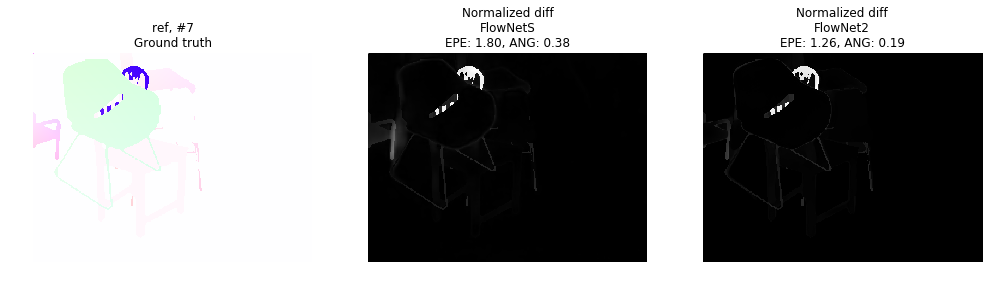

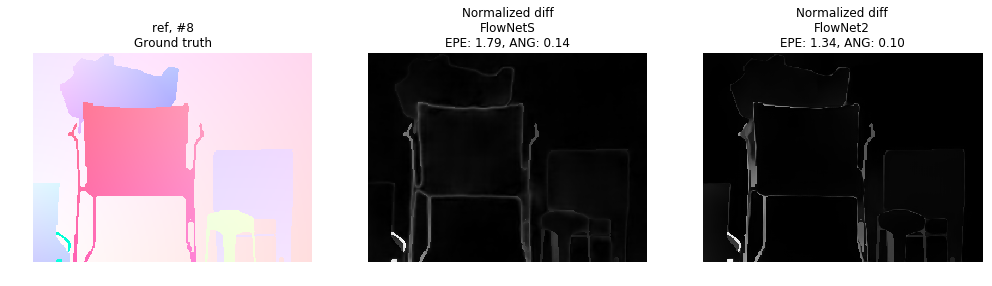

In [16]:
img_pairs, all_flows, flow_labels, is_gray, img_dir, flo_dir = load(*gt_dataset, get_dirs = True)
show_diff_metrics(all_flows, flow_labels, flo_dir, inline = True)

Image blending trial
==

May be useful as something to superimpose flow vectors on in the future.

In [20]:
data_ref = ['ref', '']
img_pairs, all_flows, flow_labels, is_gray = load(*data_ref)

In [38]:
def show_blend(imgs):
    shown_img = plt.imshow(imgs[0], alpha = 1)
    shown_img = plt.imshow(imgs[1], alpha = 0.5)

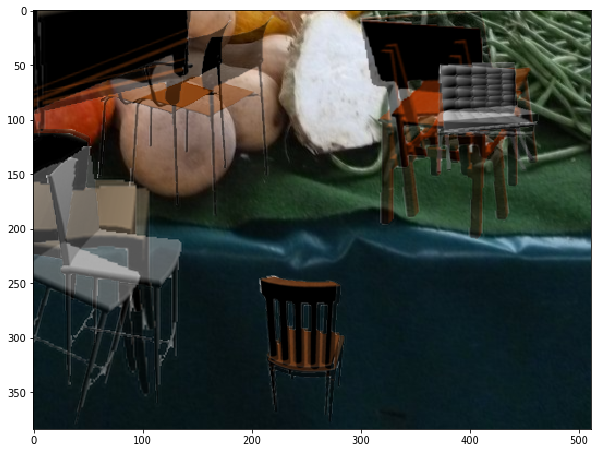

In [39]:
img_num = 0
plt.figure(figsize = (10, 10))
show_blend(img_pairs[img_num])